In [46]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [258]:
import h5py
def load_dataset():
    fn = 'data/train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn = 'data/test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test, classes
train_data, train_labels, test_data, test_labels, classes = load_dataset()

print ('train_data.shape=', train_data.shape)
print ('train_labels.shape=',  train_labels.shape)
print ('test_data.shape=', test_data.shape)
print ('test_labels.shape=', test_labels.shape)
print(classes)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1, 1080)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (1, 120)
[0 1 2 3 4 5]


# Data Processing

In [262]:
train_data = train_data.mean(axis=-1) # RGB -> Gray
train_data = train_data.reshape(train_data.shape[0], -1)
train_data = train_data.astype('float32') / 255.0

test_data = test_data.mean(axis=-1) # RGB -> Gray
test_data = test_data.reshape(test_data.shape[0], -1)
test_data = test_data.astype('float32') / 255.0

print ('train_data.shape=', train_data.shape)
print ('test_data.shape=', test_data.shape)

train_data.shape= (1080, 4096)
test_data.shape= (120, 4096)


In [264]:
from tensorflow.keras.utils import to_categorical
train_labels = train_labels.squeeze() 
test_labels = test_labels.squeeze() 

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print ('train_labels.shape=',  train_labels.shape)
print ('test_labels.shape=', test_labels.shape)

train_labels.shape= (1080, 6)
test_labels.shape= (120, 6)


# Creating a model

In [231]:
nClasses = len(classes)

def create_model (activation, num_layers, dropout_rate):
    model = Sequential()
    model.add(Dense(200, activation=activation, input_shape=(4096,), kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(Dense(100, activation=activation, kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(nClasses, activation='softmax'))
    return model

In [233]:
def plot_hist(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
     
    #Plot the Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'r',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

# Running models

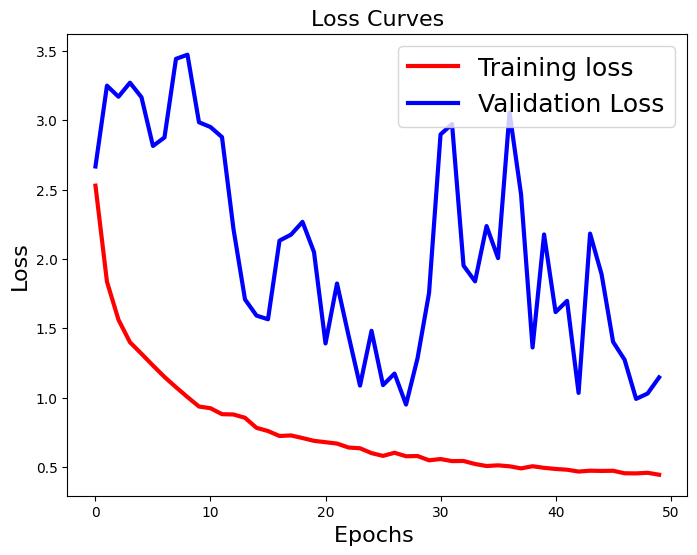

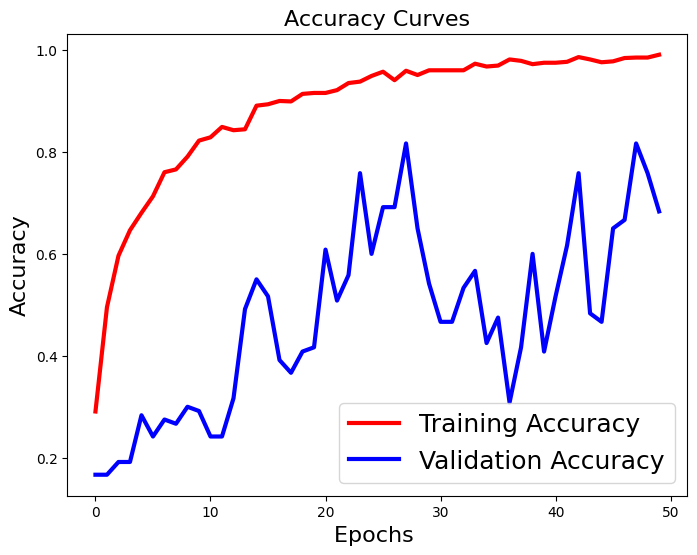

In [267]:
from tensorflow.keras.optimizers import Adam

model_1 = create_model('relu', 2, 0.2)
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=64, epochs=50, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)

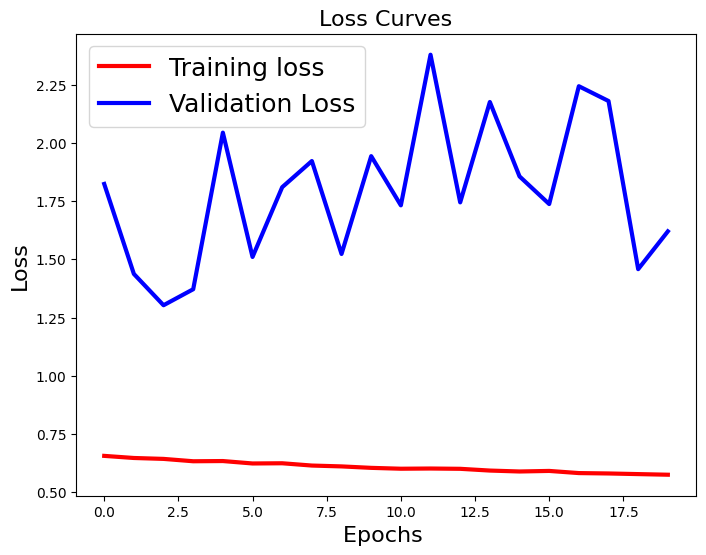

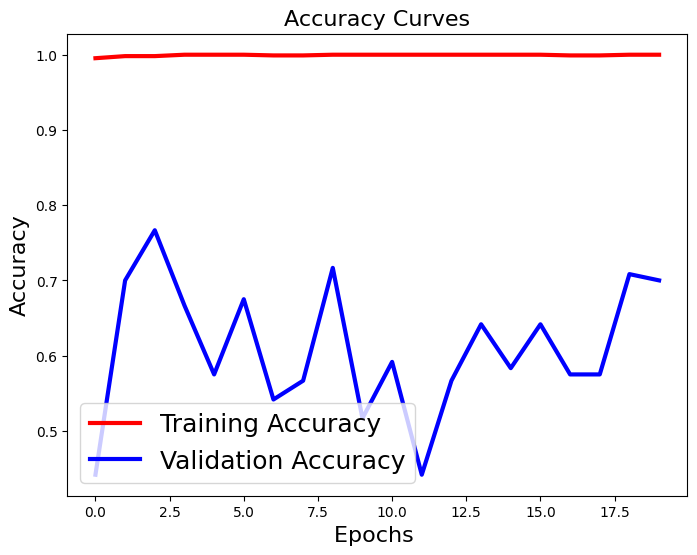

In [248]:
model_2 = create_model('tanh', 4, 0.5)
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=50, epochs=20, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)

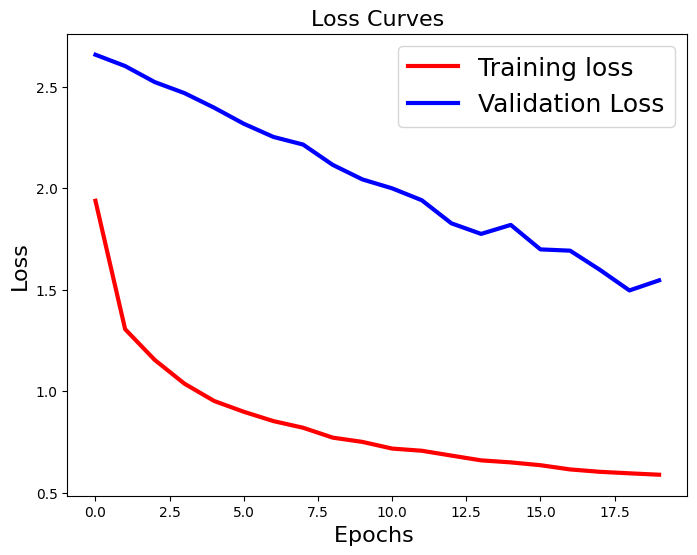

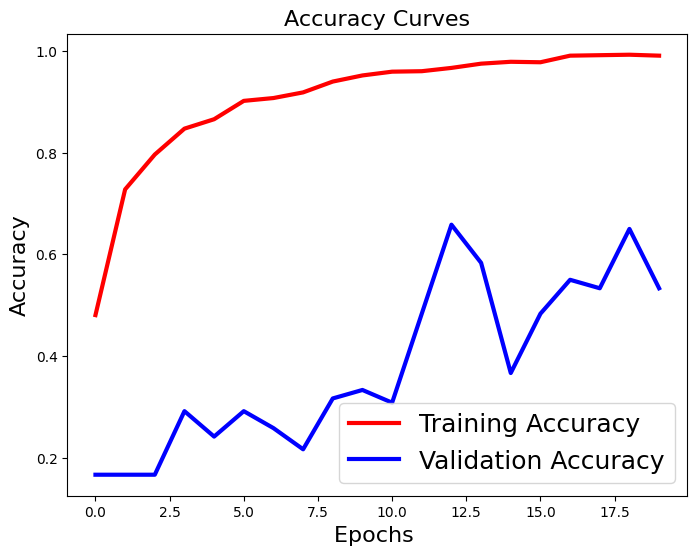

In [249]:
model_1 = create_model('sigmoid', 2, 0)
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(train_data, train_labels, batch_size=50, epochs=20, validation_data=(test_data, test_labels), verbose=False)
plot_hist(history)

# Conclusion
This models tends to overfit so we can't go with no dropout.  
Since we have small amount of data we don't need many layers. 2 is fine.  
Sigmoid func usually used for binary classification, therefore doesn't suit well our task.  
Tanh and Relu gave pretty same results, but Relu is easier to compute so we better use it instead of Tanh.